In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pickle

### read in proper motion pickle

In [3]:
pd.__version__

'1.4.1'

In [4]:
#!pip install pandas==1.4.1

In [249]:
with open("./data/map_tpm_2-10yrs.pkl", 'rb') as f:
         map_tpm = pickle.load(f)


In [250]:
map_tpm.head()

,TPM_2yrs,TPM_10yrs,coo
baseline_retrofoot_v2.0_10yrs,"[nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, ...","[nan, 0.0004, 0.0014, 0.0008, 0.0008, nan, 0.0...","[[1.325359400733194, 0.6228265854120028], [1.4..."
baseline_v2.0_10yrs,"[0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0014, 0.0002, 0.0008, nan, 0.0008...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx0_v2.0_10yrs,"[nan, nan, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, ...","[nan, 0.0002, 0.0, 0.0006, 0.0002, 0.0, 0.0002...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx1_v2.0_10yrs,"[0.0, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0002, 0.0002, 0.0002, 0.0008, nan, 0.0...","[[1.325359400733194, 0.6228265854120028], [1.4..."
carina_v2.0_10yrs,"[nan, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0002, nan, 0.0006, nan, 0.0006, 0.0014...","[[1.4235341711578748, 0.6228265854120028], [1...."


In [244]:
with open("./data/map_LS_10yrs.pkl", 'rb') as f:
         map_LS_2yr = pickle.load(f)


In [245]:
with open("./data/LS_maf_0to10yrs_v2.0_noDD.p", 'rb') as f:
         map_LS_10yr = pickle.load(f).T

In [247]:
map_LS_2yr.head()

,LS,coo
baseline_retrofoot_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, 0.0208333333333...","[[1.325359400733194, 0.6228265854120028], [1.4..."
baseline_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.09154929...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx0_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.04545454...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx1_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.05817782...","[[1.325359400733194, 0.6228265854120028], [1.4..."
carina_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, 0.1359223300970...","[[1.4235341711578748, 0.6228265854120028], [1...."


In [234]:
map_LS_10yr.head()

,LS
baseline_retrofoot_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, 0.0208333333333..."
baseline_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.09154929..."
bluer_indx0_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.04545454..."
bluer_indx1_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.05817782..."
carina_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, 0.1359223300970..."


In [182]:
len( list(map_LS.index) )

126

In [45]:
map_LS.loc['baseline_v2.0_10yrs']['LS']

masked_array(data=[nan, nan, nan, ..., 0.06242554205384799,
                   0.058860626445238595, 0.04822740338549984],
             mask=[False, False, False, ..., False, False, False],
       fill_value=-1.6375e+30)

In [48]:
map_LS.loc['baseline_v2.0_10yrs']['coo']

array([[ 1.3253594 ,  0.62282659],
       [ 1.42353417,  0.62282659],
       [ 1.52170894,  0.62282659],
       ...,
       [ 2.35619449, -1.51975975],
       [ 3.92699082, -1.51975975],
       [ 5.49778714, -1.51975975]])

In [223]:
opsim_list = list(map_LS.index)

In [224]:
opsim_list 
map_LS = map_LS_10yr.T
for i, opsim_name in enumerate(opsim_list):
    #RA = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 0])
    #Dec = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 1])
    c = map_LS.loc[opsim_name]['LS']
    
    idx_nan = np.isnan(c)
    c = c[~idx_nan]
    #RA = RA[~idx_nan]
    #Dec = Dec[~idx_nan]
    
    print(opsim_name, c[c>0.5])



baseline_retrofoot_v2.0_10yrs []
baseline_v2.0_10yrs [0.8823529411764706]
bluer_indx0_v2.0_10yrs []
bluer_indx1_v2.0_10yrs []
carina_v2.0_10yrs [0.9]
ddf_frac_ddf_per0.6_v2.0_10yrs []
ddf_frac_ddf_per1.6_v2.0_10yrs [0.5666666666666667]
local_gal_bindx0_v2.0_10yrs [1.0]
local_gal_bindx1_v2.0_10yrs []
local_gal_bindx2_v2.0_10yrs [0.8 0.9090909090909091]
long_gaps_nightsoff0_delayed-1_v2.0_10yrs []
long_gaps_nightsoff0_delayed1827_v2.0_10yrs [0.5454545454545454]
long_gaps_nightsoff1_delayed-1_v2.0_10yrs []
long_gaps_nightsoff1_delayed1827_v2.0_10yrs [0.7857142857142857]
long_gaps_nightsoff2_delayed-1_v2.0_10yrs []
long_gaps_nightsoff2_delayed1827_v2.0_10yrs []
long_gaps_nightsoff3_delayed-1_v2.0_10yrs []
long_gaps_nightsoff3_delayed1827_v2.0_10yrs []
long_gaps_nightsoff4_delayed-1_v2.0_10yrs []
long_gaps_nightsoff4_delayed1827_v2.0_10yrs []
long_gaps_nightsoff5_delayed-1_v2.0_10yrs []
long_gaps_nightsoff5_delayed1827_v2.0_10yrs []
long_gaps_nightsoff6_delayed-1_v2.0_10yrs []
long_gaps_nig

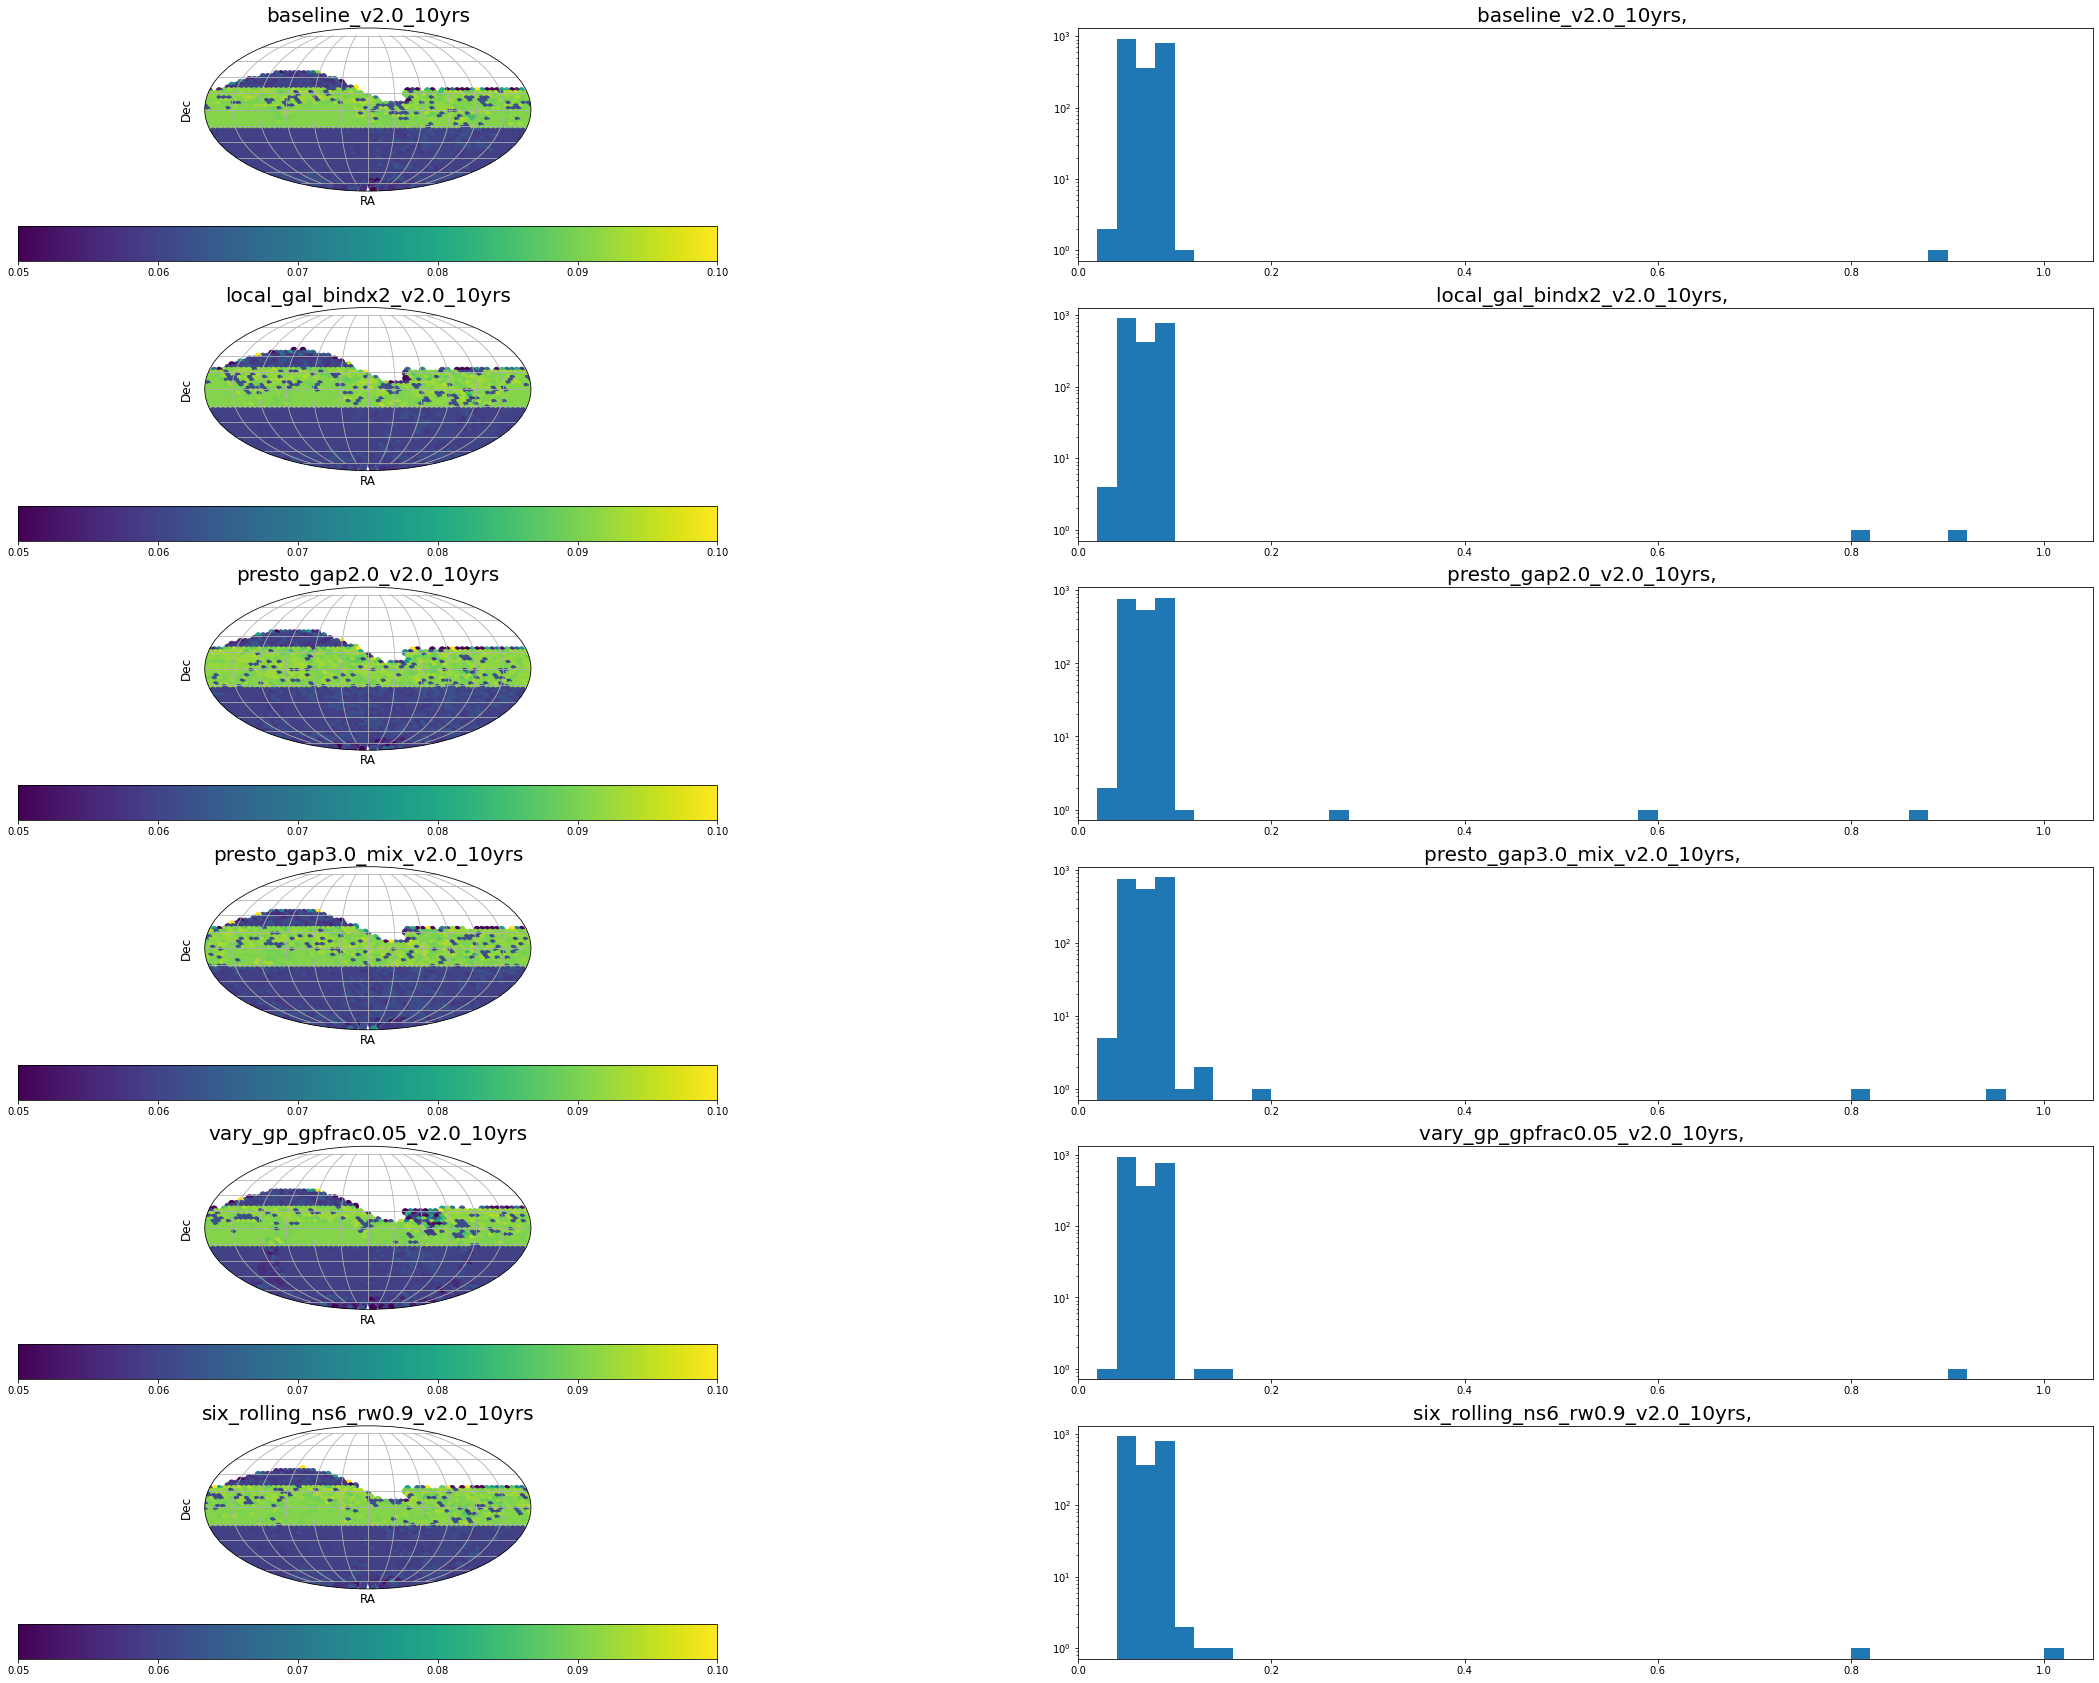

In [248]:

opsim_list = [ 'baseline_v2.0_10yrs', "local_gal_bindx2_v2.0_10yrs", 'presto_gap2.0_v2.0_10yrs', \
                'presto_gap3.0_mix_v2.0_10yrs', 'vary_gp_gpfrac0.05_v2.0_10yrs','six_rolling_ns6_rw0.9_v2.0_10yrs' ]

map_LS = map_LS_2yr
fig = plt.figure(figsize=(40, 30))

for i, opsim_name in enumerate(opsim_list):
    
    ax = fig.add_subplot(len(opsim_list), 2, 1+2*i, projection='mollweide')
    RA = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 0])
    Dec = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 1])
    c = map_LS.loc[opsim_name]['LS']
    
    idx_nan = np.isnan(c)
    c = c[~idx_nan]
    RA = RA[~idx_nan]
    Dec = Dec[~idx_nan]
    plot_mwd(ax, RA, Dec, c, vmin=0.05, vmax=0.1)
    ax.set_title(opsim_name, fontsize=20)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax = fig.add_subplot(len(opsim_list), 2, 2+2*i,)
    ax.hist(c, bins=np.arange(0, 1.2, 0.02))
    ax.set_xlim([0, 1.05])
    #ax.set_ylim([0, 1000])
    ax.set_yscale('log')
    ax.set_title(f"{opsim_name}, ", fontsize=20)




In [219]:
map_LS_10yr.T

,LS
baseline_retrofoot_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, 0.0208333333333..."
baseline_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.09154929..."
bluer_indx0_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.04545454..."
bluer_indx1_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, nan, 0.05817782..."
carina_v2.0_10yrs,"[nan, nan, nan, nan, nan, nan, 0.1359223300970..."
...,...
vary_nes_nesfrac0.50_v2.0_10yrs,"[nan, nan, nan, nan, 0.0875, nan, nan, nan, 0...."
vary_nes_nesfrac0.55_v2.0_10yrs,"[nan, 0.08620689655172414, nan, nan, nan, nan,..."
vary_nes_nesfrac0.75_v2.0_10yrs,"[nan, 0.06952965235173825, nan, 0.16, 0.054545..."
vary_nes_nesfrac1.00_v2.0_10yrs,"[0.1, nan, nan, nan, 0.0707395498392283, nan, ..."


KeyError: 'vary_expt_v2.0_10yrs'

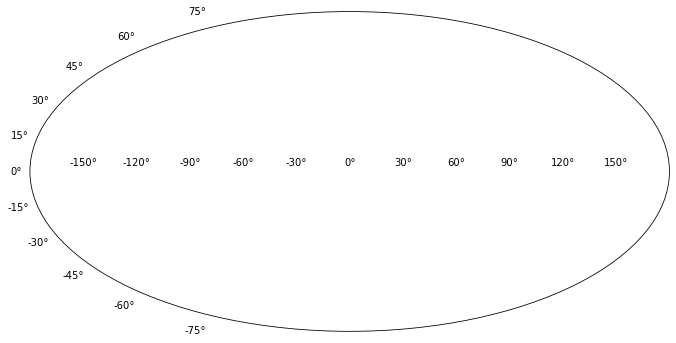

In [225]:

opsim_list = [ 'vary_expt_v2.0_10yrs', 'baseline_v2.0_10yrs',\
                'twilight_neo_nightpattern1v2.0_10yrs' ]

fig = plt.figure(figsize=(30, 20))
map_LS = map_LS_10yr
for i, opsim_name in enumerate(opsim_list):
    
    ax = fig.add_subplot(3, 2, 1+2*i, projection='mollweide')
    RA = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 0])
    Dec = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 1])
    c = map_LS.loc[opsim_name]['LS']
    
    idx_nan = np.isnan(c)
    c = c[~idx_nan]
    RA = RA[~idx_nan]
    Dec = Dec[~idx_nan]
    plot_mwd(ax, RA, Dec, c, vmin=0.05, vmax=0.1)
    ax.set_title(opsim_name, fontsize=20)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax = fig.add_subplot(3, 2, 2+2*i,)
    ax.hist(c, bins=np.arange(0, 0.2, 0.002))
    ax.set_xlim([0, 0.2])
    ax.set_ylim([0, 1000])
    ax.set_title(f"{opsim_name}, ", fontsize=20)





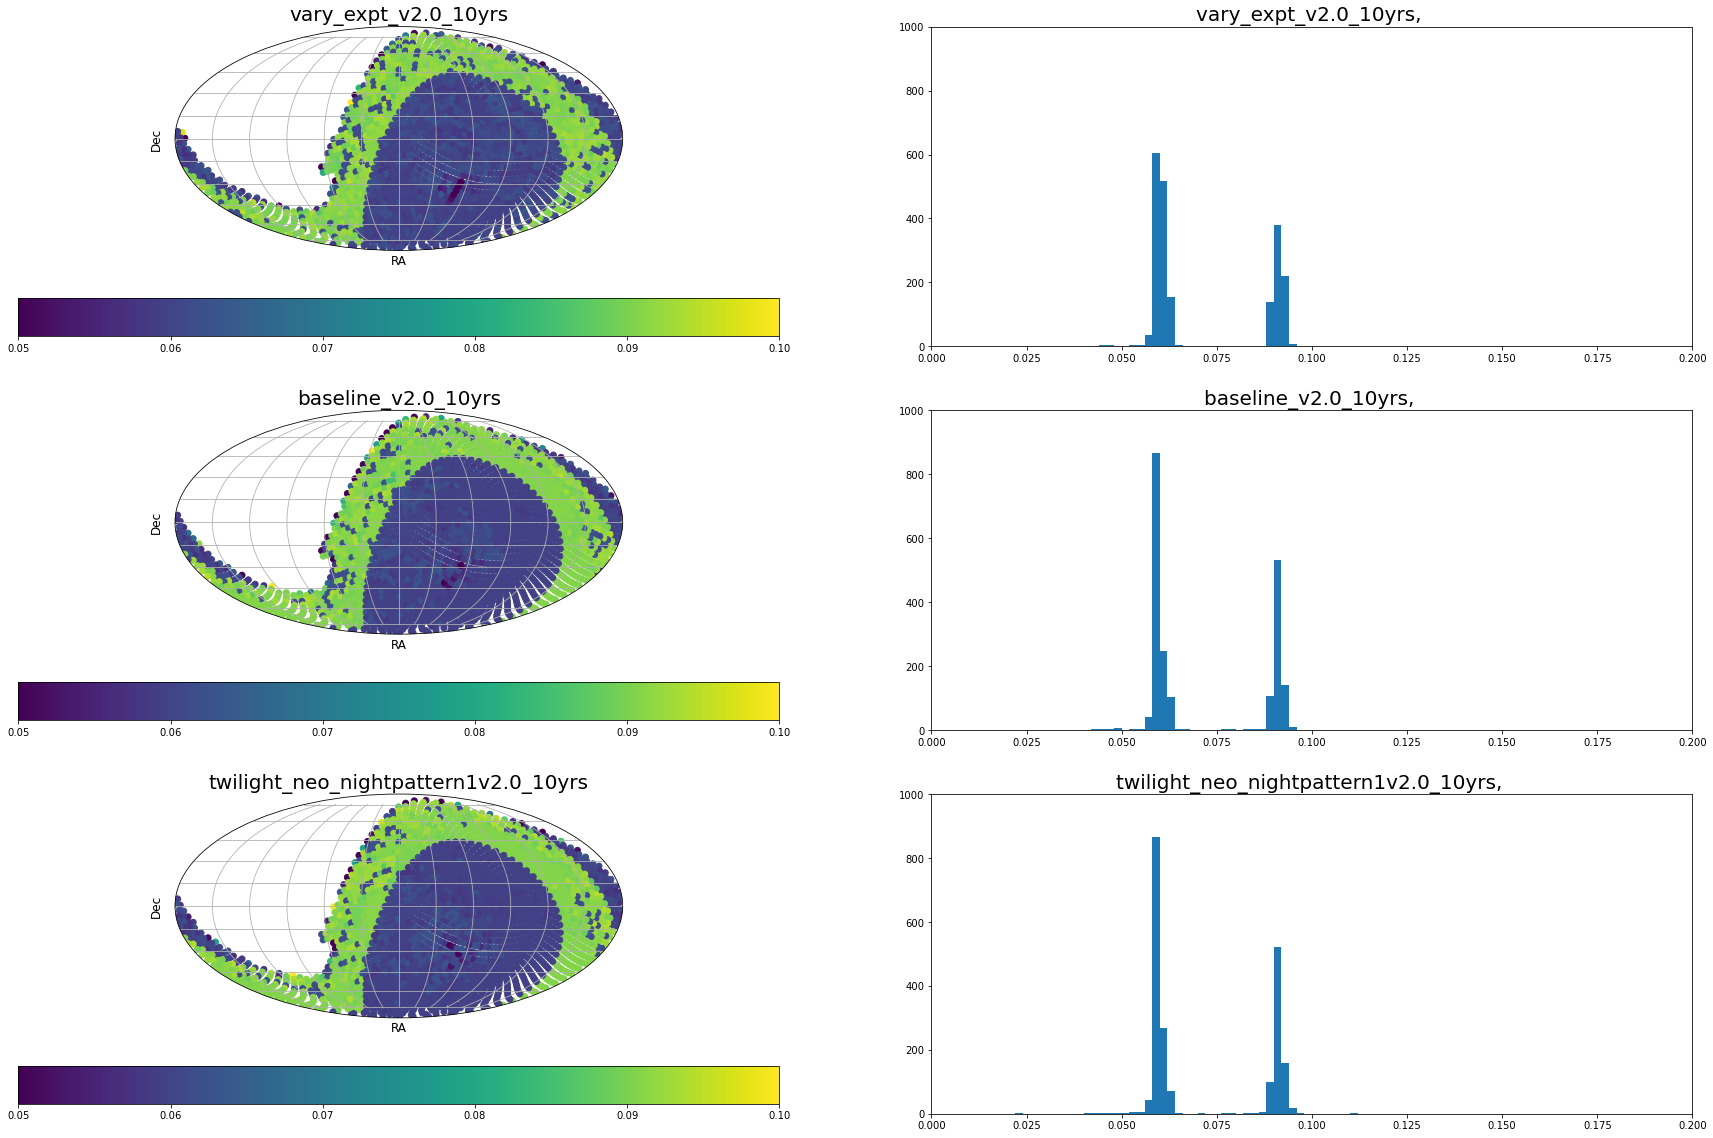

In [158]:

opsim_list = [ 'vary_expt_v2.0_10yrs', 'baseline_v2.0_10yrs',\
                'twilight_neo_nightpattern1v2.0_10yrs' ]

fig = plt.figure(figsize=(30, 20))

for i, opsim_name in enumerate(opsim_list):
    
    ax = fig.add_subplot(3, 2, 1+2*i, projection='mollweide')
    RA = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 0])
    Dec = np.rad2deg(map_LS.loc[opsim_name]['coo'][:, 1])
    c = map_LS.loc[opsim_name]['LS']
    
    idx_nan = np.isnan(c)
    c = c[~idx_nan]
    RA = RA[~idx_nan]
    Dec = Dec[~idx_nan]
    
    l, b = radec2gal(RA, Dec)
    plot_mwd(ax, l, b, c, vmin=0.05, vmax=0.1)
    ax.set_title(opsim_name, fontsize=20)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax = fig.add_subplot(3, 2, 2+2*i,)
    ax.hist(c, bins=np.arange(0, 0.2, 0.002))
    ax.set_xlim([0, 0.2])
    ax.set_ylim([0, 1000])
    ax.set_title(f"{opsim_name}, ", fontsize=20)






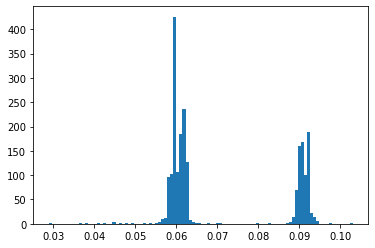

In [150]:
opsim_name = opsim_list[0]

c = map_LS.loc[opsim_name]['LS']
c = c[~np.isnan(c)]

plt.hist(c, bins=100);

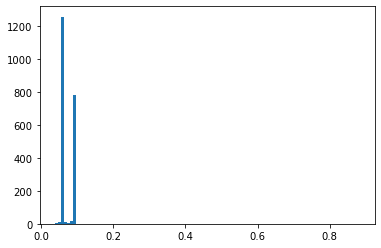

In [175]:
opsim_name = opsim_list[1]

c = map_LS.loc[opsim_name]['LS']
c = c[~np.isnan(c)]

plt.hist(c, bins=100);

In [177]:
for i in c:
    print(i)

0.09154929577464789
0.0671267252195734
0.06746560142032845
0.057049045762364047
0.05919705038918476
0.05846279640228945
0.05966143682906689
0.060912657443733226
0.05201465201465202
0.06369220821209182
0.059602649006622516
0.05638102992061877
0.06098307158882317
0.06004523956405511
0.060779114827656536
0.06093336050540045
0.05676500508646999
0.056707317073170734
0.05860579888957434
0.06372045220966084
0.061901852983099165
0.05979591836734694
0.05977152182782538
0.062180579216354344
0.06548672566371681
0.06334841628959276
0.05963488843813387
0.0571370475803172
0.06296973390209222
0.05813008130081301
0.05752032520325203
0.05873983739837398
0.06031681559707555
0.05957706384709231
0.06031681559707555
0.05753480753480753
0.060779114827656536
0.06022866476112699
0.06073619631901841
0.06154473201548808
0.061557276803913576
0.06261472567815624
0.053811659192825115
0.045714285714285714
0.06275385865150285
0.05693519079345851
0.057926829268292686
0.058549432739059964
0.059931160153877304
0.058978

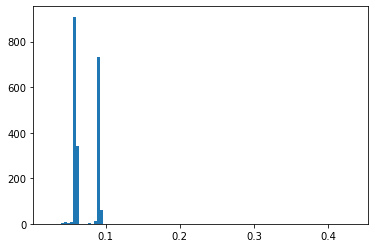

In [166]:
opsim_name = opsim_list[2]

c = map_LS.loc[opsim_name]['LS']
c = c[~np.isnan(c)]

plt.hist(c, bins=100);

In [174]:
c[c>0.3]

masked_array(data=[0.43333333333333335],
             mask=[False],
       fill_value=-1.6375e+30)

In [135]:
c

masked_array(data=[nan, nan, nan, ..., 0.05506883604505632,
                   0.061808118081180814, 0.062365075557687694],
             mask=[False, False, False, ..., False, False, False],
       fill_value=-1.6375e+30)

### map_tpm

In [251]:
map_tpm

,TPM_2yrs,TPM_10yrs,coo
baseline_retrofoot_v2.0_10yrs,"[nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, ...","[nan, 0.0004, 0.0014, 0.0008, 0.0008, nan, 0.0...","[[1.325359400733194, 0.6228265854120028], [1.4..."
baseline_v2.0_10yrs,"[0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0014, 0.0002, 0.0008, nan, 0.0008...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx0_v2.0_10yrs,"[nan, nan, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, ...","[nan, 0.0002, 0.0, 0.0006, 0.0002, 0.0, 0.0002...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx1_v2.0_10yrs,"[0.0, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0002, 0.0002, 0.0002, 0.0008, nan, 0.0...","[[1.325359400733194, 0.6228265854120028], [1.4..."
carina_v2.0_10yrs,"[nan, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0002, nan, 0.0006, nan, 0.0006, 0.0014...","[[1.4235341711578748, 0.6228265854120028], [1...."
...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,"[0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, ...","[0.0, 0.0002, 0.0006, 0.0002, 0.0008, 0.0002, ...","[[1.325359400733194, 0.6228265854120028], [1.4..."
vary_nes_nesfrac0.55_v2.0_10yrs,"[0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, ...","[0.0006, 0.0008, 0.0008, 0.0006, 0.0008, 0.000...","[[1.325359400733194, 0.6228265854120028], [1.4..."
vary_nes_nesfrac0.75_v2.0_10yrs,"[0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0006, 0.0014, 0.0006, 0.0006, 0.001, 0.0006...","[[1.325359400733194, 0.6228265854120028], [1.4..."
vary_nes_nesfrac1.00_v2.0_10yrs,"[0.0, nan, nan, nan, 0.0, nan, nan, 0.0, 0.000...","[0.0006, 0.0006, 0.0006, 0.001, 0.0016, 0.0002...","[[1.325359400733194, 0.6228265854120028], [1.4..."


In [252]:
df_TPM = map_tpm.copy()

In [253]:
opsim_list = df_TPM.index.to_list()
opsim_list.sort()

In [254]:
df_TPM.columns

Index(['TPM_2yrs', 'TPM_10yrs', 'coo'], dtype='object')

In [10]:
[opsim.replace('.', '_') for opsim in opsim_list]

['baseline_retrofoot_v2_0_10yrs',
 'baseline_v2_0_10yrs',
 'bluer_indx0_v2_0_10yrs',
 'bluer_indx1_v2_0_10yrs',
 'carina_v2_0_10yrs',
 'ddf_frac_ddf_per0_6_v2_0_10yrs',
 'ddf_frac_ddf_per1_6_v2_0_10yrs',
 'local_gal_bindx0_v2_0_10yrs',
 'local_gal_bindx1_v2_0_10yrs',
 'local_gal_bindx2_v2_0_10yrs',
 'long_gaps_nightsoff0_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff0_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff1_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff1_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff2_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff2_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff3_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff3_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff4_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff4_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff5_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff5_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff6_delayed-1_v2_0_10yrs',
 'long_gaps_nightsoff6_delayed1827_v2_0_10yrs',
 'long_gaps_nightsoff7_delayed-1_v2_0_10yr

In [11]:
colors = ['#00008f', '#004301', '#00a799', '#1F87A7', '#1f78b4', '#2A0319',
       '#33a02c', '#46982C', '#5b3600', '#5e0022', '#626d60', '#6a3d9a',
       '#933379', '#9978ff', '#a6cee3', '#b2df8a', '#cab2d6', '#e31a1c',
       '#ed00d7', '#fb9a99', '#fdbf6f', '#ff7f00', '#ffff99']

In [12]:
families = [opsim.split('_')[0] for opsim in opsim_list]
families_unique = np.unique(families)

In [13]:
family2color={}

for i in range(len(families_unique)):
    family2color[families_unique[i]] = colors[i]
family2color

{'baseline': '#00008f',
 'bluer': '#004301',
 'carina': '#00a799',
 'ddf': '#1F87A7',
 'local': '#1f78b4',
 'long': '#2A0319',
 'multi': '#33a02c',
 'noroll': '#46982C',
 'north': '#5b3600',
 'presto': '#5e0022',
 'retro': '#626d60',
 'roll': '#6a3d9a',
 'rolling': '#933379',
 'roman': '#9978ff',
 'short': '#a6cee3',
 'six': '#b2df8a',
 'smc': '#cab2d6',
 'too': '#e31a1c',
 'twilight': '#ed00d7',
 'vary': '#fb9a99',
 'virgo': '#fdbf6f'}

In [14]:
colors_all = [family2color[f] for f in families]
colors_all

['#00008f',
 '#00008f',
 '#004301',
 '#004301',
 '#00a799',
 '#1F87A7',
 '#1F87A7',
 '#1f78b4',
 '#1f78b4',
 '#1f78b4',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#2A0319',
 '#33a02c',
 '#46982C',
 '#5b3600',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#626d60',
 '#6a3d9a',
 '#933379',
 '#933379',
 '#933379',
 '#933379',
 '#933379',
 '#933379',
 '#933379',
 '#933379',
 '#933379',
 '#9978ff',
 '#a

In [256]:
df_TPM_v20 = pd.DataFrame(columns=['variable', 'values'])


In [257]:
df_TPM

,TPM_2yrs,TPM_10yrs,coo
baseline_retrofoot_v2.0_10yrs,"[nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, ...","[nan, 0.0004, 0.0014, 0.0008, 0.0008, nan, 0.0...","[[1.325359400733194, 0.6228265854120028], [1.4..."
baseline_v2.0_10yrs,"[0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0014, 0.0002, 0.0008, nan, 0.0008...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx0_v2.0_10yrs,"[nan, nan, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, ...","[nan, 0.0002, 0.0, 0.0006, 0.0002, 0.0, 0.0002...","[[1.325359400733194, 0.6228265854120028], [1.4..."
bluer_indx1_v2.0_10yrs,"[0.0, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0002, 0.0002, 0.0002, 0.0008, nan, 0.0...","[[1.325359400733194, 0.6228265854120028], [1.4..."
carina_v2.0_10yrs,"[nan, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, ...","[0.0, 0.0002, nan, 0.0006, nan, 0.0006, 0.0014...","[[1.4235341711578748, 0.6228265854120028], [1...."
...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,"[0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, ...","[0.0, 0.0002, 0.0006, 0.0002, 0.0008, 0.0002, ...","[[1.325359400733194, 0.6228265854120028], [1.4..."
vary_nes_nesfrac0.55_v2.0_10yrs,"[0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, ...","[0.0006, 0.0008, 0.0008, 0.0006, 0.0008, 0.000...","[[1.325359400733194, 0.6228265854120028], [1.4..."
vary_nes_nesfrac0.75_v2.0_10yrs,"[0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0006, 0.0014, 0.0006, 0.0006, 0.001, 0.0006...","[[1.325359400733194, 0.6228265854120028], [1.4..."
vary_nes_nesfrac1.00_v2.0_10yrs,"[0.0, nan, nan, nan, 0.0, nan, nan, 0.0, 0.000...","[0.0006, 0.0006, 0.0006, 0.001, 0.0016, 0.0002...","[[1.325359400733194, 0.6228265854120028], [1.4..."


In [258]:
# create csv files
for opsim in opsim_list:
    tpm_values = df_TPM.loc[opsim]['TPM_10yrs'].data
    opsim = opsim.replace('.', '_')
    print(opsim)
    df_temp = pd.DataFrame()
    df_temp['variable'] = [opsim]*len(tpm_values)
    df_temp['values'] = tpm_values
    
    #print(opsim)
    df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
    
    

baseline_retrofoot_v2_0_10yrs
baseline_v2_0_10yrs
bluer_indx0_v2_0_10yrs
bluer_indx1_v2_0_10yrs
carina_v2_0_10yrs
ddf_frac_ddf_per0_6_v2_0_10yrs
ddf_frac_ddf_per1_6_v2_0_10yrs
local_gal_bindx0_v2_0_10yrs
local_gal_bindx1_v2_0_10yrs
local_gal_bindx2_v2_0_10yrs
long_gaps_nightsoff0_delayed-1_v2_0_10yrs
long_gaps_nightsoff0_delayed1827_v2_0_10yrs
long_gaps_nightsoff1_delayed-1_v2_0_10yrs
long_gaps_nightsoff1_delayed1827_v2_0_10yrs
long_gaps_nightsoff2_delayed-1_v2_0_10yrs
long_gaps_nightsoff2_delayed1827_v2_0_10yrs
long_gaps_nightsoff3_delayed-1_v2_0_10yrs
long_gaps_nightsoff3_delayed1827_v2_0_10yrs
long_gaps_nightsoff4_delayed-1_v2_0_10yrs
long_gaps_nightsoff4_delayed1827_v2_0_10yrs
long_gaps_nightsoff5_delayed-1_v2_0_10yrs
long_gaps_nightsoff5_delayed1827_v2_0_10yrs
long_gaps_nightsoff6_delayed-1_v2_0_10yrs
long_gaps_nightsoff6_delayed1827_v2_0_10yrs
long_gaps_nightsoff7_delayed-1_v2_0_10yrs
long_gaps_nightsoff7_delayed1827_v2_0_10yrs
long_gaps_np_nightsoff0_delayed-1_v2_0_10yrs
long_ga

/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

long_gaps_np_nightsoff6_delayed1827_v2_0_10yrs
long_gaps_np_nightsoff7_delayed-1_v2_0_10yrs
long_gaps_np_nightsoff7_delayed1827_v2_0_10yrs
long_u1_v2_0_10yrs
long_u2_v2_0_10yrs
multi_short_v2_0_10yrs
noroll_v2_0_10yrs
north_stripe_v2_0_10yrs
presto_gap1_5_mix_v2_0_10yrs
presto_gap1_5_v2_0_10yrs
presto_gap2_0_mix_v2_0_10yrs
presto_gap2_0_v2_0_10yrs
presto_gap2_5_mix_v2_0_10yrs
presto_gap2_5_v2_0_10yrs
presto_gap3_0_mix_v2_0_10yrs
presto_gap3_0_v2_0_10yrs
presto_gap3_5_mix_v2_0_10yrs
presto_gap3_5_v2_0_10yrs
presto_gap4_0_mix_v2_0_10yrs
presto_gap4_0_v2_0_10yrs
presto_half_gap1_5_mix_v2_0_10yrs
presto_half_gap1_5_v2_0_10yrs
presto_half_gap2_0_mix_v2_0_10yrs
presto_half_gap2_0_v2_0_10yrs
presto_half_gap2_5_mix_v2_0_10yrs
presto_half_gap2_5_v2_0_10yrs
presto_half_gap3_0_mix_v2_0_10yrs
presto_half_gap3_0_v2_0_10yrs
presto_half_gap3_5_mix_v2_0_10yrs
presto_half_gap3_5_v2_0_10yrs
presto_half_gap4_0_mix_v2_0_10yrs
presto_half_gap4_0_v2_0_10yrs
retro_baseline_v2_0_10yrs
roll_early_v2_0_10yrs
ro

/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

rolling_bulge_ns2_rw0_9_v2_0_10yrs
rolling_ns2_rw0_5_v2_0_10yrs
rolling_ns2_rw0_9_v2_0_10yrs
rolling_ns3_rw0_5_v2_0_10yrs
rolling_ns3_rw0_9_v2_0_10yrs
roman_v2_0_10yrs
short_exp_v2_0_10yrs
six_rolling_ns6_rw0_5_v2_0_10yrs
six_rolling_ns6_rw0_9_v2_0_10yrs
smc_movie_v2_0_10yrs
too_rate10_v2_0_10yrs
too_rate50_v2_0_10yrs
twilight_neo_nightpattern1v2_0_10yrs
twilight_neo_nightpattern2v2_0_10yrs
twilight_neo_nightpattern3v2_0_10yrs
twilight_neo_nightpattern4v2_0_10yrs
twilight_neo_nightpattern5v2_0_10yrs
twilight_neo_nightpattern6v2_0_10yrs
twilight_neo_nightpattern7v2_0_10yrs
vary_expt_v2_0_10yrs
vary_gp_gpfrac0_01_v2_0_10yrs
vary_gp_gpfrac0_05_v2_0_10yrs
vary_gp_gpfrac0_10_v2_0_10yrs
vary_gp_gpfrac0_15_v2_0_10yrs
vary_gp_gpfrac0_20_v2_0_10yrs
vary_gp_gpfrac0_25_v2_0_10yrs
vary_gp_gpfrac0_30_v2_0_10yrs
vary_gp_gpfrac0_35_v2_0_10yrs
vary_gp_gpfrac0_40_v2_0_10yrs
vary_gp_gpfrac0_45_v2_0_10yrs
vary_gp_gpfrac0_50_v2_0_10yrs
vary_gp_gpfrac0_55_v2_0_10yrs
vary_gp_gpfrac0_75_v2_0_10yrs
vary_gp_gp

/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

vary_nes_nesfrac0_10_v2_0_10yrs
vary_nes_nesfrac0_15_v2_0_10yrs
vary_nes_nesfrac0_20_v2_0_10yrs
vary_nes_nesfrac0_25_v2_0_10yrs
vary_nes_nesfrac0_30_v2_0_10yrs
vary_nes_nesfrac0_35_v2_0_10yrs
vary_nes_nesfrac0_40_v2_0_10yrs
vary_nes_nesfrac0_45_v2_0_10yrs
vary_nes_nesfrac0_50_v2_0_10yrs
vary_nes_nesfrac0_55_v2_0_10yrs
vary_nes_nesfrac0_75_v2_0_10yrs
vary_nes_nesfrac1_00_v2_0_10yrs
virgo_cluster_v2_0_10yrs


/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TPM_v20 = df_TPM_v20.append(df_temp, ignore_index=True,)
/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_4335/3100032699.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

In [259]:
df_TPM_v20

,variable,values
0,baseline_retrofoot_v2_0_10yrs,NaN
1,baseline_retrofoot_v2_0_10yrs,0.0004
2,baseline_retrofoot_v2_0_10yrs,0.0014
3,baseline_retrofoot_v2_0_10yrs,0.0008
4,baseline_retrofoot_v2_0_10yrs,0.0008
...,...,...
266756,virgo_cluster_v2_0_10yrs,0.0202
266757,virgo_cluster_v2_0_10yrs,0.0272
266758,virgo_cluster_v2_0_10yrs,0.0214
266759,virgo_cluster_v2_0_10yrs,0.0164


In [260]:
df_TPM_v20.to_csv("./data/TPM_v20_10yrs.csv", index=False)

In [261]:
df_TPM_v20[df_TPM_v20['variable']=='multi_short_v2_0_10yrs']

,variable,values
92856,multi_short_v2_0_10yrs,NaN
92857,multi_short_v2_0_10yrs,NaN
92858,multi_short_v2_0_10yrs,0.0002
92859,multi_short_v2_0_10yrs,0.0002
92860,multi_short_v2_0_10yrs,0.0002
...,...,...
94963,multi_short_v2_0_10yrs,0.0016
94964,multi_short_v2_0_10yrs,0.0044
94965,multi_short_v2_0_10yrs,0.0072
94966,multi_short_v2_0_10yrs,0.0082


In [262]:
df_TPM_v20[df_TPM_v20['variable']=='local_gal_bindx1_v2_0_10yrs']['values']

16823       NaN
16824    0.0004
16825       NaN
16826    0.0008
16827    0.0008
          ...  
18930    0.0306
18931    0.0254
18932    0.0182
18933    0.0174
18934    0.0168
Name: values, Length: 2112, dtype: object

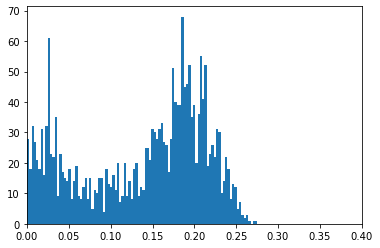

In [264]:
plt.hist(df_TPM_v20[df_TPM_v20['variable']=='multi_short_v2_0_10yrs']['values'].values, bins=100);

plt.xlim([0, 0.4]);

In [32]:
np.unique(df_TPM_v20['variable'])

array(['baseline_retrofoot_v2_0_10yrs', 'baseline_v2_0_10yrs',
       'bluer_indx0_v2_0_10yrs', 'bluer_indx1_v2_0_10yrs',
       'carina_v2_0_10yrs', 'ddf_frac_ddf_per0_6_v2_0_10yrs',
       'ddf_frac_ddf_per1_6_v2_0_10yrs', 'local_gal_bindx0_v2_0_10yrs',
       'local_gal_bindx1_v2_0_10yrs', 'local_gal_bindx2_v2_0_10yrs',
       'long_gaps_nightsoff0_delayed-1_v2_0_10yrs',
       'long_gaps_nightsoff0_delayed1827_v2_0_10yrs',
       'long_gaps_nightsoff1_delayed-1_v2_0_10yrs',
       'long_gaps_nightsoff1_delayed1827_v2_0_10yrs',
       'long_gaps_nightsoff2_delayed-1_v2_0_10yrs',
       'long_gaps_nightsoff2_delayed1827_v2_0_10yrs',
       'long_gaps_nightsoff3_delayed-1_v2_0_10yrs',
       'long_gaps_nightsoff3_delayed1827_v2_0_10yrs',
       'long_gaps_nightsoff4_delayed-1_v2_0_10yrs',
       'long_gaps_nightsoff4_delayed1827_v2_0_10yrs',
       'long_gaps_nightsoff5_delayed-1_v2_0_10yrs',
       'long_gaps_nightsoff5_delayed1827_v2_0_10yrs',
       'long_gaps_nightsoff6_delayed-1_

### LSmap

In [4]:
LSmap = pd.read_csv("./data/map_LS_v2.0_2yrs.csv")

In [38]:
pd.read_pickle("./data/LS_map_2yrs_v2.pickle.p")

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/Users/home/miniconda3/envs/datasci/lib/python3.8/site-packages/pandas/_libs/internals.cpython-38-darwin.so'>

In [5]:
LSmap

,db,LS-3s,coo
0,vary_gp_gpfrac0.10_v2.0_10yrs,[nan 0.002026342451874367 0.001828153564899451...,[[ 1.86532064 0.2959688 ]\n [ 1.81623325 0.2...
1,rolling_ns2_rw0.5_v2.0_10yrs,[nan 0.0022271714922048997 0.00263157894736842...,[[ 1.96349541 0.2959688 ]\n [ 1.81623325 0.2...
2,rolling_ns3_rw0.9_v2.0_10yrs,[0.0022271714922048997 0.002631578947368421 0....,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...
3,long_u2_v2.0_10yrs,[0.0016210739614994933 0.00342327829238824 0.0...,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...
4,long_gaps_nightsoff0_delayed1827_v2.0_10yrs,[0.0022271714922048997 0.002631578947368421 0....,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...
...,...,...,...
102,long_gaps_nightsoff5_delayed-1_v2.0_10yrs,[0.0004065040650406504 0.003033367037411527 0....,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...
103,long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs,[0.0022271714922048997 0.002631578947368421 0....,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...
104,presto_gap3.5_v2.0_10yrs,[0.0014030867909400682 0.0004048582995951417 0...,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...
105,presto_half_gap3.5_v2.0_10yrs,[0.002007226013649137 0.003216726980297547 0.0...,[[ 1.81623325 0.25268026]\n [ 1.91440802 0.2...


In [14]:
sigma3 = LSmap.iloc[0]['LS-3s']

In [15]:
coo = LSmap.iloc[0]['coo']

In [34]:
sigma3.strip('[]').split(' ')

['nan',
 '0.002026342451874367',
 '0.0018281535648994515',
 '...',
 '0.001419590346785642\n',
 '0.0004048582995951417',
 'nan']

In [35]:
for i in sigma3.strip('[]').split(' '):
    print(i)

nan
0.002026342451874367
0.0018281535648994515
...
0.001419590346785642

0.0004048582995951417
nan


In [31]:
coo.split('\n')

['[[ 1.86532064  0.2959688 ]',
 ' [ 1.81623325  0.25268026]',
 ' [ 1.91440802  0.25268026]',
 ' ...',
 ' [ 1.72787596 -1.31494387]',
 ' [ 0.19634954 -1.36631613]',
 ' [ 1.37444679 -1.36631613]]']

### prepare for histogram

In [69]:
df = pd.read_csv('./data/TPM.csv')

In [9]:
df.columns

Index(['Unnamed: 0', 'variable', 'values'], dtype='object')

In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
def replace_dot(df, col):
    """replace . in dbname by _ for d3js"""
    #dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    dbname = df[col].replace(".", "_")
    return dbname


In [27]:
df['variable'] = df.apply(replace_dot, args=['variable'], axis=1 )

In [29]:
df.to_csv("./data/TPM.csv", index=False)

In [31]:
df['variable'].values

array(['dcr_nham1_ugri_v1_5_10yrs', 'dcr_nham1_ugri_v1_5_10yrs',
       'dcr_nham1_ugri_v1_5_10yrs', ..., 'filterdist_indx5_v1_5_10yrs',
       'filterdist_indx5_v1_5_10yrs', 'filterdist_indx5_v1_5_10yrs'],
      dtype=object)

In [37]:
list( np.unique( np.sort( df['variable'].values ) ) )

['agnddf_v1_5_10yrs',
 'alt_dust_v1_5_10yrs',
 'alt_roll_mod2_dust_sdf_0_20_v1_5_10yrs',
 'baseline_2snaps_v1_5_10yrs',
 'baseline_samefilt_v1_5_10yrs',
 'baseline_v1_5_10yrs',
 'bulges_bs_v1_5_10yrs',
 'bulges_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_bs_v1_5_10yrs',
 'bulges_cadence_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_i_heavy_v1_5_10yrs',
 'bulges_i_heavy_v1_5_10yrs',
 'daily_ddf_v1_5_10yrs',
 'dcr_nham1_ug_v1_5_10yrs',
 'dcr_nham1_ugr_v1_5_10yrs',
 'dcr_nham1_ugri_v1_5_10yrs',
 'dcr_nham2_ug_v1_5_10yrs',
 'dcr_nham2_ugr_v1_5_10yrs',
 'dcr_nham2_ugri_v1_5_10yrs',
 'descddf_v1_5_10yrs',
 'filterdist_indx1_v1_5_10yrs',
 'filterdist_indx2_v1_5_10yrs',
 'filterdist_indx3_v1_5_10yrs',
 'filterdist_indx4_v1_5_10yrs',
 'filterdist_indx5_v1_5_10yrs',
 'filterdist_indx6_v1_5_10yrs',
 'filterdist_indx7_v1_5_10yrs',
 'filterdist_indx8_v1_5_10yrs',
 'footprint_add_mag_cloudsv1_5_10yrs',
 'footprint_big_sky_dustv1_5_10yrs',
 'footprint_big_sky_nouiyv1_5_10yrs',
 'footprint_big_skyv1_5_10yrs',
 

### prepare for radar plots

In [70]:
def replace_dot(df):
    """replace . in dbname by _ for d3js"""
    dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    return dbname
    
def get_df_radar_d3js(df_radar):
    """get csv data for d3js radar plot"""
    df_radar['db'] = df_radar.apply(replace_dot, axis=1)
    df_radar_t = df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})
    return df_radar_t


In [85]:
df_radar = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/all_foms_timedomain_astrometry.csv')


df_radar = df_radar.drop('family', axis=1)
df_radar = df_radar.drop('Unnamed: 0', axis=1)



In [86]:
df_radar["PM"] = 1/3 * (df_radar["TPM"] + df_radar["LS"] + df_radar["CI"])

In [87]:
df_radar = df_radar.drop('TPM', axis=1)
df_radar = df_radar.drop('LS', axis=1)
df_radar = df_radar.drop('CI', axis=1)




In [88]:
df_radar_t = get_df_radar_d3js(df_radar)
df_radar_t.to_csv("data/df_radar_all_foms2_t.csv", index=False)


In [89]:
df_radar_t

db,section,agnddf,alt_dust,alt_roll_mod2_dust_sdf_0_20,baseline_2snaps,baseline_samefilt,baseline,bulges_bs,bulges_bulge_wfd,bulges_cadence_bs,...,wfd_depth_scale0_80_noddf,wfd_depth_scale0_80,wfd_depth_scale0_85_noddf,wfd_depth_scale0_85,wfd_depth_scale0_90_noddf,wfd_depth_scale0_90,wfd_depth_scale0_95_noddf,wfd_depth_scale0_95,wfd_depth_scale0_99_noddf,wfd_depth_scale0_99
0,flux change,0.132988,0.133044,0.138956,0.135375,0.206479,0.142425,0.122704,0.126914,0.130511,...,0.149917,0.144886,0.158663,0.157811,0.153213,0.149066,0.138201,0.157164,0.153669,0.150922
1,color,0.503818,0.703636,0.795575,0.461125,0.190582,0.542411,0.396956,0.391134,0.408157,...,0.510940,0.463325,0.547196,0.494813,0.580788,0.522871,0.610349,0.551025,0.663368,0.609797
2,footprint,0.717233,0.442079,0.551082,0.437133,0.519281,0.752009,0.325309,0.309274,0.327589,...,0.655294,0.468470,0.797643,0.613872,0.872836,0.741422,0.940147,0.844745,0.975811,0.911669
3,star count,0.728116,0.254255,0.306606,0.467183,0.504146,0.766289,0.268242,0.241618,0.263078,...,0.676951,0.497516,0.795106,0.641503,0.846012,0.766310,0.925828,0.837897,0.940291,0.900263
4,depth,0.931742,0.800220,0.692088,0.863893,0.866805,0.922776,0.927274,0.929885,0.923457,...,0.933398,0.913452,0.938971,0.915785,0.938782,0.920611,0.942230,0.921092,0.942138,0.920876
5,PM,0.360996,0.437974,0.608098,0.657432,0.407147,0.408935,0.399158,0.497079,0.480139,...,0.487117,0.493935,0.417698,0.462134,0.470938,0.366446,0.505863,0.402378,0.373185,0.702034


In [150]:
df_pm_v15 = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/Score_foms_v1.5_10yrs.csv')
df_pm_v17 = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/Score_foms_v1.7_10yrs.csv')



In [151]:
df_pm_v15.head(2)

,Unnamed: 0,TPM,LS,CI
0,dcr_nham1_ugri_v1.5_10yrs,0.643610,0.475287,0.712348
1,rolling_mod6_sdf_0.20_v1.5_10yrs,0.719596,0.545273,0.700522


In [152]:
df_pm_v15.rename(columns={"Unnamed: 0":"db"}, inplace=True)
df_pm_v17.rename(columns={"Unnamed: 0":"db"}, inplace=True)

df_pm_v15.sort_values(by='db', inplace=True)

df_pm_v17.sort_values(by='db', inplace=True)

In [73]:
df_pm = df_pm_v15.append(df_pm_v17, ignore_index=True)


In [156]:
def scale(arr, mode=0):
    """scale array by max or scale to 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr


In [65]:
df_pm.columns

Index(['db', 'TPM', 'LS', 'CI'], dtype='object')

In [75]:
for col in ['TPM', 'LS', 'CI']:
    df_pm[col] = scale( df_pm[col].values )

In [76]:
df_pm.to_csv("data/df_radar_pm_10yrs.csv",index=False)

df_radar_t = get_df_radar_d3js(df_pm)
df_radar_t.to_csv("data/df_radar_pm_10yrs_t.csv", index=False)



In [77]:
ls data

Fields_nside16.csv       data_IC.csv              df_radar_pm_2yrs_t.csv
Fields_nside64.csv       data_doubleHist.csv      df_radar_wfd.csv
TPM.csv                  df_radar.csv             df_radar_wfd_t.csv
TwoNum.csv               df_radar_all_foms.csv    df_rank.csv
data_11.csv              df_radar_all_foms_t.csv  df_rank_t.csv
data_12.csv              df_radar_pm_10yrs.csv    heatmap_data.csv
data_12_2.csv            df_radar_pm_10yrs_t.csv  iris.csv


In [78]:
df_radar_t

db,section,agnddf,alt_dust,alt_roll_mod2_dust_sdf_0_20,baseline_2snaps,baseline_samefilt,baseline,bulges_bs,bulges_bulge_wfd,bulges_cadence_bs,...,twi_neo_pattern6_v1_7_10yrs,twi_neo_pattern7_v1_7_10yrs,twi_pairs_mixed_repeat_v1_7_10yrs,twi_pairs_mixed_v1_7_10yrs,twi_pairs_repeat_v1_7_10yrs,twi_pairs_v1_7_10yrs,u_long_ms_30_v1_7_10yrs,u_long_ms_40_v1_7_10yrs,u_long_ms_50_v1_7_10yrs,u_long_ms_60_v1_7_10yrs
0,TPM,0.793800,0.796910,0.725070,0.803958,0.833242,0.792020,0.633561,0.621486,0.625616,...,0.706006,0.777165,0.624409,0.608860,0.657788,0.595258,0.777264,0.752384,0.729322,0.744588
1,LS,0.449657,0.549249,0.527580,0.479428,0.478071,0.476087,0.492866,0.485462,0.486134,...,0.730189,0.746686,0.775209,0.782503,0.794939,0.791407,0.734065,0.769304,0.786162,0.768732
2,CI,0.700429,0.665481,0.660286,0.650577,0.752308,0.698308,0.634528,0.625488,0.634575,...,0.906488,0.913767,0.942149,0.951681,0.944306,0.955021,0.974635,0.955746,0.930184,0.909624


### data for barh 

In [161]:
df_pm_v15 = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/Score_foms_v1.5_10yrs.csv')
df_pm_v15.rename(columns={"Unnamed: 0":"db"}, inplace=True)

df_pm_v15.sort_values(by='db', inplace=True, ignore_index=True)


In [162]:
for col in ['TPM', 'LS', 'CI']:
    df_pm_v15[col] = scale( df_pm_v15[col].values, mode=1 )


In [170]:
def replace_dot(df):
    """replace . in dbname by _ for d3js"""
    #dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    dbname = df['db'].replace(".", "_")

    return dbname
  

In [172]:
def get_df_radar_d3js(df_radar):
    """get csv data for d3js radar plot"""
    df_radar['db'] = df_radar.apply(replace_dot, axis=1)
    df_radar_t = df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})
    return df_radar_t



In [166]:
df_pm_v15['db'] = df_pm_v15.apply(replace_dot, axis=1)

In [168]:
df_pm_v15.to_csv("./data/df_pm_v15.csv", index=False)

In [173]:
df_radar_t = get_df_radar_d3js(df_pm_v15)
df_radar_t.to_csv("data/df_pm_v15_t.csv", index=False)


In [174]:
df_radar_t

db,section,agnddf_v1_5_10yrs,alt_dust_v1_5_10yrs,alt_roll_mod2_dust_sdf_0_20_v1_5_10yrs,baseline_2snaps_v1_5_10yrs,baseline_samefilt_v1_5_10yrs,baseline_v1_5_10yrs,bulges_bs_v1_5_10yrs,bulges_bulge_wfd_v1_5_10yrs,bulges_cadence_bs_v1_5_10yrs,...,wfd_depth_scale0_80_noddf_v1_5_10yrs,wfd_depth_scale0_80_v1_5_10yrs,wfd_depth_scale0_85_noddf_v1_5_10yrs,wfd_depth_scale0_85_v1_5_10yrs,wfd_depth_scale0_90_noddf_v1_5_10yrs,wfd_depth_scale0_90_v1_5_10yrs,wfd_depth_scale0_95_noddf_v1_5_10yrs,wfd_depth_scale0_95_v1_5_10yrs,wfd_depth_scale0_99_noddf_v1_5_10yrs,wfd_depth_scale0_99_v1_5_10yrs
0,TPM,0.679991,0.684818,0.573327,0.695757,0.741202,0.677229,0.431311,0.412572,0.418982,...,0.803227,0.503560,0.576778,0.628100,0.723074,0.646521,0.682017,0.698015,0.742214,0.759245
1,LS,0.159391,0.311512,0.278414,0.204864,0.202792,0.199761,0.225390,0.214081,0.215108,...,0.181797,0.208472,0.159836,0.172488,0.186500,0.192803,0.133056,0.154708,0.168470,0.208935
2,CI,0.455847,0.392367,0.382931,0.365295,0.550083,0.451995,0.336142,0.319722,0.336228,...,0.430939,0.393979,0.470765,0.431916,0.494811,0.455007,0.525985,0.484504,0.557374,0.501368


In [176]:
list(df_pm_v15['db'].values)

['agnddf_v1_5_10yrs',
 'alt_dust_v1_5_10yrs',
 'alt_roll_mod2_dust_sdf_0_20_v1_5_10yrs',
 'baseline_2snaps_v1_5_10yrs',
 'baseline_samefilt_v1_5_10yrs',
 'baseline_v1_5_10yrs',
 'bulges_bs_v1_5_10yrs',
 'bulges_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_bs_v1_5_10yrs',
 'bulges_cadence_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_i_heavy_v1_5_10yrs',
 'bulges_i_heavy_v1_5_10yrs',
 'daily_ddf_v1_5_10yrs',
 'dcr_nham1_ug_v1_5_10yrs',
 'dcr_nham1_ugr_v1_5_10yrs',
 'dcr_nham1_ugri_v1_5_10yrs',
 'dcr_nham2_ug_v1_5_10yrs',
 'dcr_nham2_ugr_v1_5_10yrs',
 'dcr_nham2_ugri_v1_5_10yrs',
 'descddf_v1_5_10yrs',
 'filterdist_indx1_v1_5_10yrs',
 'filterdist_indx2_v1_5_10yrs',
 'filterdist_indx3_v1_5_10yrs',
 'filterdist_indx4_v1_5_10yrs',
 'filterdist_indx5_v1_5_10yrs',
 'filterdist_indx6_v1_5_10yrs',
 'filterdist_indx7_v1_5_10yrs',
 'filterdist_indx8_v1_5_10yrs',
 'footprint_add_mag_cloudsv1_5_10yrs',
 'footprint_big_sky_dustv1_5_10yrs',
 'footprint_big_sky_nouiyv1_5_10yrs',
 'footprint_big_skyv1_5_10yrs',
 

### skymap data

In [10]:
ls 'data'

Fields_nside16.csv        data_doubleHist.csv       df_radar_wfd.csv
Fields_nside64.csv        df_radar.csv              df_radar_wfd_t.csv
TPM.csv                   df_radar_all_foms.csv     df_rank.csv
TwoNum.csv                df_radar_all_foms2_t.csv  df_rank_t.csv
data_11.csv               df_radar_all_foms_t.csv   heatmap_data.csv
data_12.csv               df_radar_pm_10yrs.csv     iris.csv
data_12_2.csv             df_radar_pm_10yrs_t.csv   tmp_map.pickle
data_IC.csv               df_radar_pm_2yrs_t.csv


In [30]:
def replace_dot(df, col):
    """replace . in dbname by _ for d3js"""
    #dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    dbname = df[col].replace(".", "_")
    return dbname



In [97]:
df = pd.read_pickle("./data/tmp_map.pickle")

In [98]:
df.reset_index(inplace=True)

In [99]:
df.rename({'index': 'db'}, axis=1, inplace=True)


In [100]:
df.sort_values(by="db", ascending=True, ignore_index=True, inplace=True)

In [101]:
df['db'] = df.apply(replace_dot, args=['db'], axis=1 )

In [102]:
df.head(2)

,db,coo,values
0,agnddf_v1_5_10yrs,"[[0.04908738521234052, 0.08343008661061502], [...","[0.353322528363047, 0.32392363931762796, 0.235..."
1,alt_dust_v1_5_10yrs,"[[0.0, 0.20987059226273774], [0.09817477042468...","[0.3466450435840259, 0.3185035389282103, 0.323..."


In [103]:
df_skymap = pd.DataFrame(columns=['db', 'RA', 'Dec', 'value'])


for i in range(86):
    df_skymap_i = pd.DataFrame()
    coord = df.iloc[i]['coo']
    df_skymap_i['db'] = [ df.iloc[i]['db'] ] * coord.shape[0]
    df_skymap_i['fieldRa'] = coord[:,0] * 180/np.pi  # convert to degree
    df_skymap_i['fieldDec'] = coord[:,1] * 180/np.pi
    df_skymap_i['value'] = df.iloc[i]['values'].data

    df_skymap = pd.concat([df_skymap, df_skymap_i], ignore_index=True)



In [104]:
df_skymap.to_csv("./data/pm_skymap.csv", index=False)

In [105]:
df_skymap.head()

,db,RA,Dec,value,fieldRa,fieldDec
0,agnddf_v1_5_10yrs,NaN,NaN,0.353323,2.8125,4.780192
1,agnddf_v1_5_10yrs,NaN,NaN,0.323924,8.4375,4.780192
2,agnddf_v1_5_10yrs,NaN,NaN,0.235091,14.0625,4.780192
3,agnddf_v1_5_10yrs,NaN,NaN,0.168455,19.6875,4.780192
4,agnddf_v1_5_10yrs,NaN,NaN,0.306710,25.3125,4.780192


### light curve

In [136]:
lc_dic = pd.read_pickle('data/GPalltemplfit_Ib_B_V0.pkl')

In [137]:
df = pd.DataFrame(lc_dic)
df.head()

,t,average,averageShifted,variance,varianceShifted,stdev,stdShifted,rollingWeightedAverage,rollingWeightedStd,rollingMedian,rollingPc25,rollingPc75,median,pc25,pc75,meansmooth
0,-15.0,NaN,NaN,NaN,NaN,0.677319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,-14.5,NaN,NaN,NaN,NaN,0.638464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,-14.0,NaN,NaN,NaN,NaN,0.608229,0.0,NaN,NaN,NaN,NaN,NaN,-0.910613,-0.910613,-0.910613,0.0
3,-13.5,NaN,NaN,NaN,NaN,0.584688,0.0,NaN,NaN,NaN,NaN,NaN,-0.878367,-0.878367,-0.878367,0.0
4,-13.0,NaN,NaN,NaN,NaN,0.529372,0.0,NaN,NaN,NaN,NaN,NaN,-0.842413,-0.842413,-0.842413,0.0


In [138]:
df.fillna(0, axis=0, inplace=True)

In [126]:
df.head()

,t,average,averageShifted,variance,varianceShifted,stdev,stdShifted,rollingWeightedAverage,rollingWeightedStd,rollingMedian,rollingPc25,rollingPc75,median,pc25,pc75,meansmooth
0,-15.0,0.0,0.0,0.0,0.0,0.677319,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,-14.5,0.0,0.0,0.0,0.0,0.638464,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,-14.0,0.0,0.0,0.0,0.0,0.608229,0.0,0.0,0.0,0.0,0.0,0.0,-0.910613,-0.910613,-0.910613,0.0
3,-13.5,0.0,0.0,0.0,0.0,0.584688,0.0,0.0,0.0,0.0,0.0,0.0,-0.878367,-0.878367,-0.878367,0.0
4,-13.0,0.0,0.0,0.0,0.0,0.529372,0.0,0.0,0.0,0.0,0.0,0.0,-0.842413,-0.842413,-0.842413,0.0


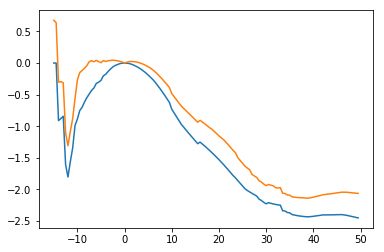

In [139]:
plt.plot(df.t.values, df['median'].values)
plt.plot(df.t.values, df['median'].values + df['stdev'].values)

In [148]:
df_lc = pd.DataFrame()
df_lc['t'] = df['t'].values + 20
df_lc['mag'] = df['median'].values + 1
df_lc['stdev'] = df['stdev'].values
df_lc.head()

,t,mag,stdev
0,5.0,1.000000,0.677319
1,5.5,1.000000,0.638464
2,6.0,0.089387,0.608229
3,6.5,0.121633,0.584688
4,7.0,0.157587,0.529372


In [149]:
df_lc.to_csv("./data/GPtemp_Ic_B.csv", index=False)

In [135]:
df_lc.describe()

,t,mag,stdev
count,130.000000,130.000000,130.000000
mean,17.250000,-1.362276,0.309222
std,18.835914,0.899195,0.135261
min,-15.000000,-2.450928,0.000000
25%,1.125000,-2.315431,0.267647
50%,17.250000,-1.435157,0.308449
75%,33.375000,-0.464346,0.370007
max,49.500000,0.000000,0.677319


In [156]:
def get_pixId(df, nside=16):
    '''get pixId for each field'''
    pixId = RADec2pix(nside, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df

def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid

def radec2xyz(ra, dec):
    '''convert ra/dec to xyz'''
    theta = 0.5 * np.pi - np.deg2rad(dec)
    phi = np.deg2rad(ra)
    xyz = hp.ang2vec(theta, phi)
    
    return xyz

def radec2gal(ra, dec):
    '''convert from ra/dec to galactic l/b'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=ra, dec=dec, 
                 unit=(u.degree, u.degree))
    
    l = c.galactic.l.degree
    b = c.galactic.b.degree
    return l, b

def gal2radec(gl, gb):
    '''convert gl/gb to ra/dec'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(l=gl, b=gb, frame="galactic",
                unit=(u.degree, u.degree))
    ra = c.icrs.ra.degree
    dec = c.icrs.dec.degree
    return ra, dec


# plot function
# plot skymap

def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmin=0, vmax=None, colorbar=True, **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
        
    '''
    import numpy as np
    import matplotlib.pyplot as plt

    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=vmin, vmax=vmax, **kwargs)  # convert degrees to radians
    # ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)